## Final Report

# <p style="font-size:40px ; color:blue" align="center">NLP with Git Hub Readme Files</p> <sub>By Christine Cabanela, Scott Schmidl, Christian Freeman, and Kaniela Denis - 11 Feb 2022</sub>

<hr style="border:2px solid blue"> </hr>

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Agenda

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Overview

## Project Description: 
In this project, we will utilize the text in README files of x repositories that relate to health, explore initial questions and find common words that have a correlation to various programming languages.  We will use machine learning to create a classification model that predicts what programming language a repository is, depending on what text is included in the README file.

## Goal: 
Our overall goal is to identify key words among a variation of REPOs on Guthub and create a model to predict what programming language that a repository is based on the text included in the README files.

## Support:
- Please see README for data dictionary.

In [1]:
# import needed libraries
import pandas as pd
from split_get_scale import SplitGetScale
import viz
import stat_testing
import modeling

import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Acquire

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Prepare

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Explore

## Questions to Explore:

- Question 1: What are the most common words in READMEs?
- Question 2: What does the distribution of IDFs look like for the most common words?
- Question 3: Does the length of the README vary by programming language?
- Question 4: Do different programming languages use a different number of unique words?

In [2]:
# import dataframe
filename = "nutrition_repos_clean_stemmed_lemmatize.csv"
df = pd.read_csv(filename)

# create object for split data
sgs = SplitGetScale()
train, test = sgs.split(df)

# create separate copy for bivariate viz and stats
train_viz_stats = train.copy()

# create X and y for stemmed readme contents
(X_train_stemmed, y_train_stemmed), (X_test_stemmed, y_test_stemmed) = sgs.get_Xy(train, test, cols_train="clean_stemmed")

# create X and y for lemmatized readme contents
(X_train_lemmed, y_train_lemmed), (X_test_lemmed, y_test_lemmed) = sgs.get_Xy(train, test, cols_train="clean_lemmatized")

## Visualizations and Statistical Testing
- For the statistical testing done on questions 3 and 4 the significance level equals 0.05.

### Question 1
What are the most common words in READMEs?

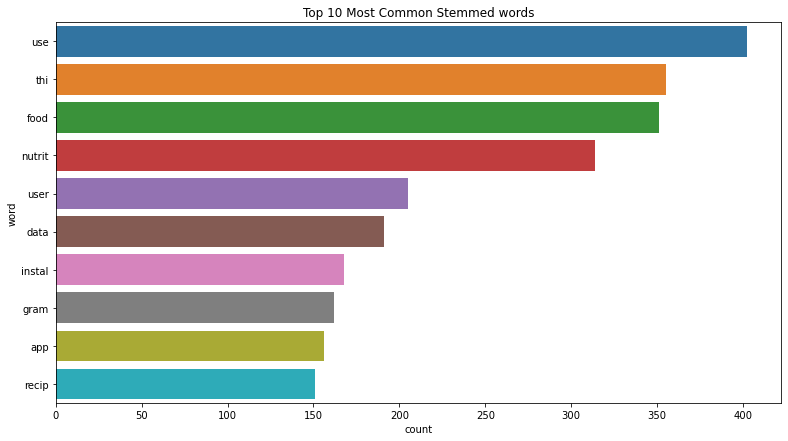

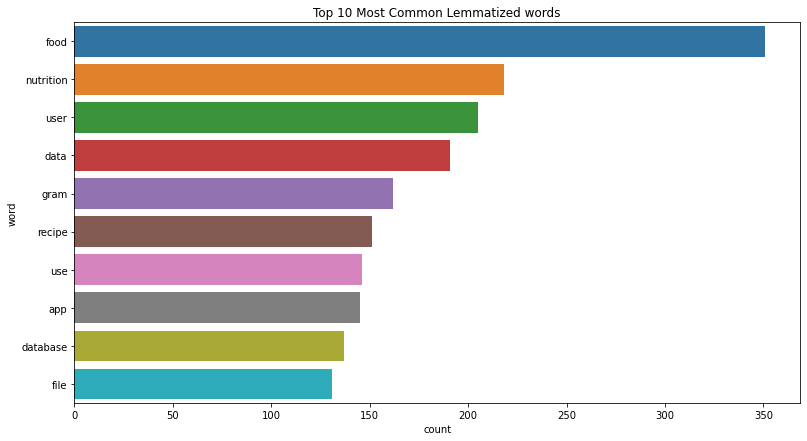

In [3]:
# get top 10 stemmed and lemmed words
stemm_words, stemm_top_10_words = viz.stemm_top_ten_words(df)
lemm_top_10_words, lemm_words = viz.lemm_top_ten_words(df)
viz.stemm_top_ten(stemm_top_10_words)
viz.lemm_top_ten(lemm_top_10_words)

### Take Aways
- Top 10 Most Common Stemmed Words
  - use
  - thi
  - food
  - nutrit
  - user
  - data
  - instal
  - gram
  - app
  - run
<p></p>

- Top 10 Most Common Lemmatized Words
  - food
  - nutrition
  - user
  - data
  - gram
  - recipe
  - use
  - app
  - database
  - file

### Question 2
What does the distribution of IDFs look like for the most common words?

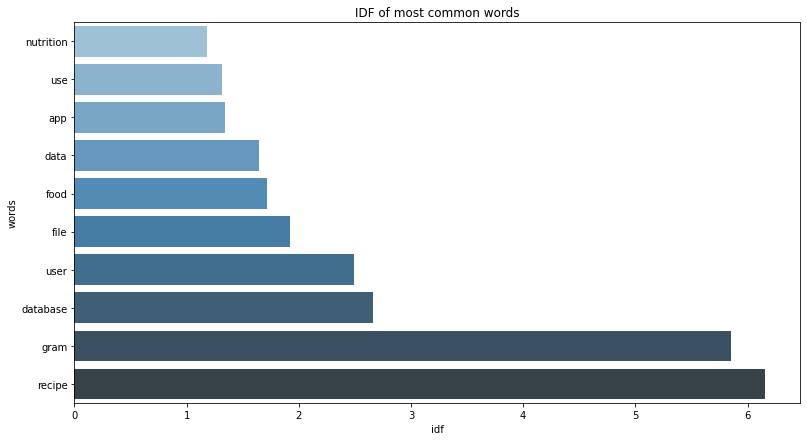

In [4]:
# get the idf of most common words
words_df = viz.data_words_idf(df)
viz.idf_words_viz(words_df)

### Take Away
- IDF of most common words:
  - recipe
  - gram
  - database
  - user
  - file
  - food
  - data
  - app
  - use
  - nutrition

### Question 3
Does the length of the README vary by programming language?
- $H_O$: two or more groups have the same population mean.
- $H_A$: two or more groups have different population means.

The Anova test for Stemmed : F_onewayResult(statistic=1.7695947265830319, pvalue=0.15872927480972487)
The Anova test for Lemmetize : F_onewayResult(statistic=1.8007264742868438, pvalue=0.15281445790951187)


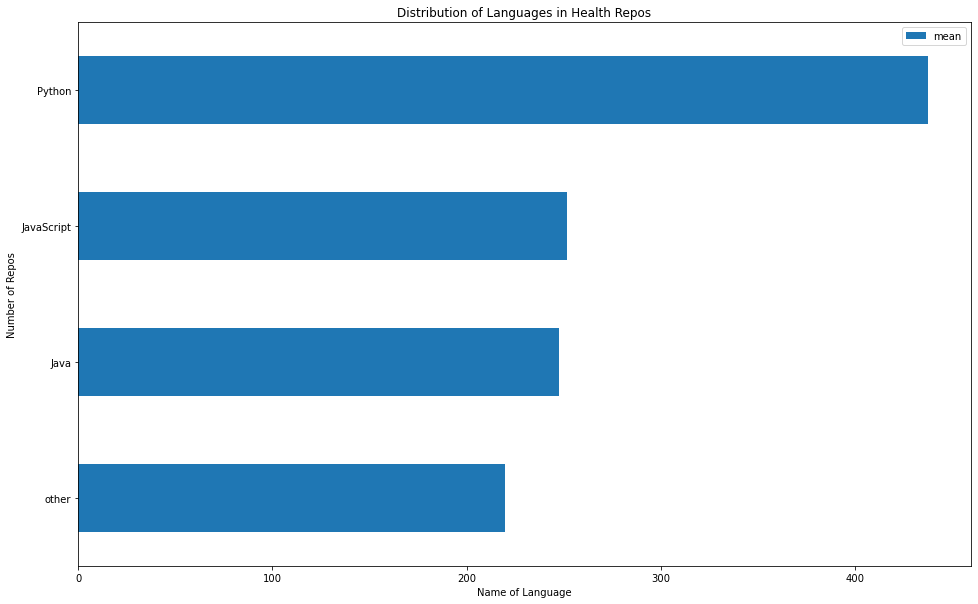

In [5]:
# check mean length of each readme
viz.q3_viz(train_viz_stats)
stat_testing.q3_stat_test(train_viz_stats)

### Take Away
- With both p-values great than the significance level, we can say that there exists a significanct difference between means.

### Question 4
Do different programming languages use a different number of unique words?

- $H_O$: two or more groups have the same population mean.
- $H_A$: two or more groups have different population means.

(1.2745629844457906, 0.28801993783271557)

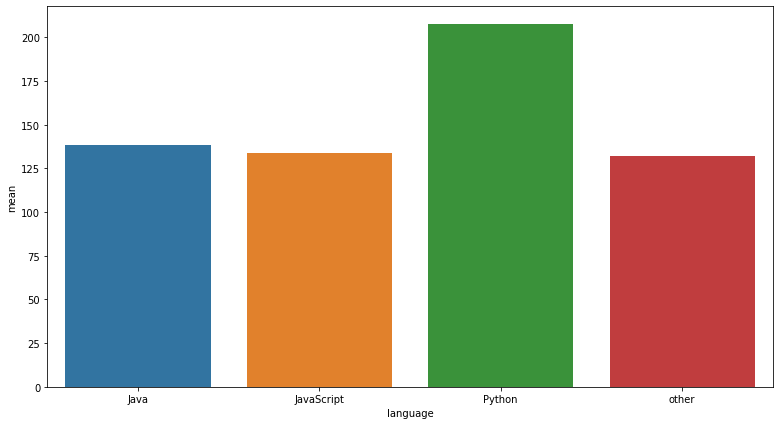

In [6]:
# check count of unique stemmed words per readme
viz.get_unique_stemmed_viz(train_viz_stats)
f, p = stat_testing.get_unique_stemmed_anova(train_viz_stats)
f, p


### Take Away
- With a p-value great than the significance level, we can say that there exists a significant difference between means.

(1.2456742313314006, 0.29802306391968963)

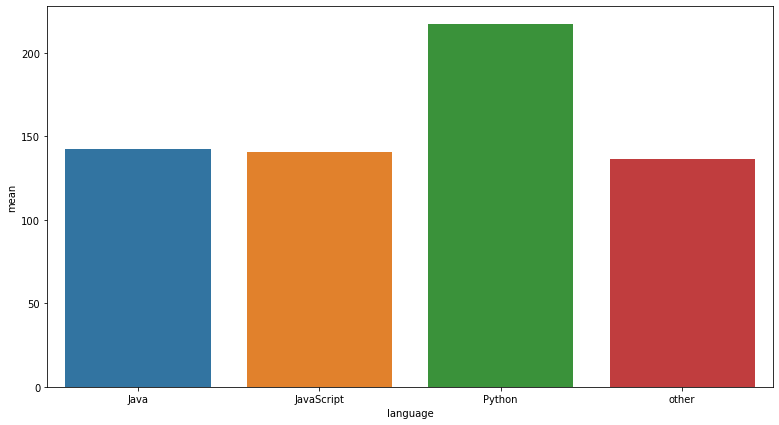

In [7]:
# check count of unique lemmatized words per readme
viz.get_unique_lemmed_viz(train_viz_stats)
f, p = stat_testing.get_unique_lemmed_anova(train_viz_stats)
f, p

### Take Away
- With a p-value great than the significance level, we can say that there exists a significant difference between means.

## Exploration Summary:
- The most common words between stemmed and lemmatize:
  - food
  - nutrition
  - user
  - use
<p></p>

- The IDF for the most common words:
  - recipe
  - gram
  - database
  - user
  - file
  - food
  - data
  - app
  - use
  - nutrition
<p></p>

- Means are significantly different when it comes to README length with Python leading.
<p></p>

- Means are significantly different when it comes to number of unique words with Python leading.

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Model

- Our Baseline was predicting the majority class, which is this case was "other". The accuracy was between 44%.

### Baseline

In [8]:
print(f"Baseline Accuracy: {modeling.get_baseline(train)}")

Baseline Accuracy: 0.44


## Modeling: Logistic Regression, Random Forest Classifier, KNN Classifier, and Decision Tree were used

### Logistic Regression

In [9]:
y_train_stemmed, y_test_stemmed = modeling.lr_stemm(y_train_stemmed, y_test_stemmed, X_train_stemmed, X_test_stemmed)
y_train_lemmed, y_test_lemmed = modeling.lr_lemm(y_train_lemmed, y_test_lemmed, X_train_lemmed, X_test_lemmed)

modeling.lr_print(y_train_lemmed, y_test_lemmed, y_train_stemmed, y_test_stemmed)

TRAIN
Logistics Regression Stemmed Accuracy: 0.83
Logistics Regression Lemmed Accuracy: 0.83

TEST
Logistics Regression Stemmed Accuracy Test: 0.5
Logistics Regression Lemmed Accuracy Test: 0.5


### Random Forest Classifier

In [10]:
modeling.print_rfc_metric(X_train_stemmed, X_test_stemmed, y_train_stemmed["actual"], y_test_stemmed["actual"], X_train_lemmed, X_test_lemmed, y_train_lemmed["actual"], y_test_lemmed["actual"])

TRAIN
Random Forest Classifier Stemmed Accuracy: 0.7
Random Forest Classifier Lemmed Accuracy: 0.99

TEST
Random Forest Classifier Stemmed Accuracy Test: 0.46
Random Forest Classifier Lemmed Accuracy Test: 0.54


### KNN Classifier

In [11]:
modeling.knn_stemmed(X_train_stemmed, y_train_stemmed["actual"], X_test_stemmed, y_test_stemmed["actual"])

Accuracy of KNN classifier on training set: 0.667
Accuracy of KNN classifier on test set: 0.500


In [12]:
modeling.knn_lemmed(X_train_lemmed, y_train_lemmed["actual"], X_test_lemmed, y_test_lemmed["actual"])

Accuracy of KNN classifier on train set: 0.624
Accuracy of KNN classifier on test set: 0.458


### Decision Tree Classifier

In [13]:
modeling.q3_dtree_model(X_train_stemmed, y_train_stemmed["actual"], X_train_lemmed, y_train_lemmed["actual"], X_test_stemmed, y_test_stemmed["actual"], X_test_lemmed, y_test_lemmed["actual"])

Accuracy on Stemmed training set : 0.60
Accuracy on Stemmed testing set : 0.33
Accuracy on Lematized training set : 0.69
Accuracy on Lematized testing set : 0.54


##  Conclusion
- There are significant differences between the mean length of each README per programming language.
- There are significant differences between the mean of the amount of unique words in each README per programming language.
- While the Logistic Regression did better than the Random Forest Classifier on stemmed README's, it was the opposite for lemmatized README's.
- Logistic Regression and Random Forest Classifer are overfit.
- Decision Tree Classifier was overfit.
- The KNN Classifier was overfit by a smaller margin.

## Recommendations and Next Steps
- More data needs to be scraped. Due to time constraints, only 130 README's were obtained with 12 being removed during the cleaning process. The ideal amount of README's would be great than 1000 README's to have enough data for train, validate, and test.